# 3. Model Training with Second Order Optimizers

In [1]:
import sys

sys.path.append("../../")
sys.path.append("/home/ferroelectric/m3_learning/m3_learning/src")

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz
from m3_learning.be.dataset import BE_Dataset
from m3_learning.be.nn import SHO_fit_func_nn, SHO_Model
from m3_learning.optimizers.TrustRegion import TRCG
import m3_learning

printing = printer(basepath = './Figures/')


set_style("printing")
random_seed(seed=42)

%matplotlib inline

2023-05-18 15:29:31.238643: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 15:29:31.359118: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-18 15:29:31.971426: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/cv2/../../lib64:
2023-05-18 15:29:31.971474: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libr

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Loads Data


In [3]:
# Specify the filename and the path to save the file
filename = "data_raw_SHO.h5"
save_path = "./Data"


data_path = save_path + "/" + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, resample_bins=None, SHO_fit_func_NN=SHO_fit_func_nn)

# print the contents of the file
dataset.print_be_tree()

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Noisy_Data_1
    ├ Noisy_Data_2
    ├ Noisy_Data_3
    ├ Noisy_Data_4
    ├ Noisy_Data_5
    ├ Noisy_Data_6
    ├ Noisy_Data_7
    ├ Noisy_Data_8
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
├ Noisy_Data_1_SHO_Fit
  --------

In [4]:
# instantiates the visualization object
BE_viz = Viz(dataset, printing, verbose=True)

## Adahessian

### Pytorch Model

#### Model Architecture


In [6]:
optimizer = {"name": "TRCG", "optimizer":TRCG, "radius": 5, "device": "cuda","ADAM_epochs": 2}

In [39]:
random_seed(seed=42)

# instantiate the model
ADAHessian_model = SHO_Model(dataset, training=True, model_basename="SHO_Fitter_original_data_adahessian")

# constructs a test train split
X_train, X_test, y_train, y_test = dataset.test_train_split_(shuffle=True)

Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42
Using GPU NVIDIA GeForce RTX 3090

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = None
    Noise Level = 0
                  
None


In [8]:
random_seed(seed=42)

# instantiate the model
TR_model = SHO_Model(dataset, training=True, model_basename="SHO_Fitter_original_data_adahessian")

# constructs a test train split
X_train, X_test, y_train, y_test = dataset.test_train_split_(shuffle=True)

Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42
Using GPU NVIDIA GeForce RTX 3090

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = None
    Noise Level = 0
                  
None


In [14]:
train = True

# if train:
    # fits the model
TR_model.fit(
    dataset.X_train[0:100000],
    50000,
    optimizer=optimizer,
    epochs = 100,
)
# else:
    # ADAHessian_model.load(
    #     "/home/ferroelectric/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Trained Models/SHO Fitter/SHO_Fitter_original_data_model_epoch_5_train_loss_0.0449272525189978.pth"
    # )

Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42
epoch : 1/100, recon loss = 0.46022183
--- 1.9584100246429443 seconds ---
epoch : 2/100, recon loss = 0.41334829
--- 1.4638166427612305 seconds ---
epoch : 3/100, recon loss = 0.32836643
--- 1.7298648357391357 seconds ---
epoch : 4/100, recon loss = 0.26618382
--- 2.687958002090454 seconds ---
epoch : 5/100, recon loss = 0.25222786
--- 2.0761191844940186 seconds ---
epoch : 6/100, recon loss = 0.23301863
--- 1.3186569213867188 seconds ---
epoch : 7/100, recon loss = 0.22472110
--- 1.6704139709472656 seconds ---
epoch : 8/100, recon loss = 0.21505700
--- 1.5239434242248535 seconds ---
epoch : 9/100, recon loss = 0.19690544
--- 1.6610331535339355 seconds ---
epoch : 10/100, recon loss = 0.17837498
--- 1.669748067855835 seconds ---
epoch : 11/100, recon loss = 0.13826537
--- 2.1393373012542725 seconds ---
epoch : 12/100, recon loss = 0.11288884
--- 2.48522686958313 seconds ---
epoch : 13/100, recon loss = 0.

### Evaluate the Neural Network Results

It is always recommended to validate that the autoencoder is working correctly. We can do this by comparing the different stages of the autoencoder including the raw data, the generated curves.


./Figures/Figure_10_NN_validation_Train.png
./Figures/Figure_10_NN_validation_Train.svg


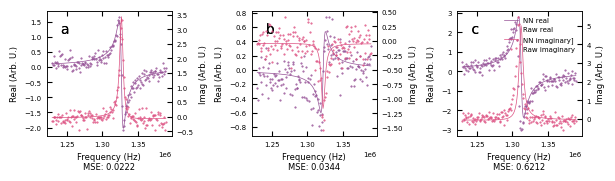

In [9]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_train,
    prediction=ADAHessian_model,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename="Figure_10_NN_validation_Train",
)

./Figures/Figure_10_NN_validation_Train.png
./Figures/Figure_10_NN_validation_Train.svg


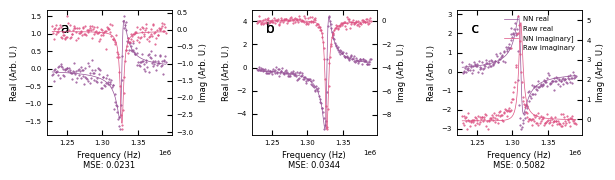

In [10]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_test,
    prediction=ADAHessian_model,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename="Figure_10_NN_validation_Train",
)


    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = None
    Noise Level = 0
                  
None
./Figures/Figure_12_NN_validation_full_data.png
./Figures/Figure_12_NN_validation_full_data.svg


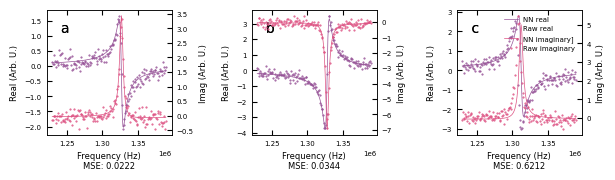

In [12]:
state = {
    "fitter": "LSQF",
    "raw_format": "complex",
    "resampled": True,
    "scaled": True,
    "output_shape": "index",
}

X_data, Y_data = dataset.NN_data()

d1, d2, index1, mse1 = BE_viz.bmw_nn(
    state,
    prediction=ADAHessian_model,
    out_state={"scaled": True, "measurement State": "complex"},
    returns=True,
    filename="Figure_12_NN_validation_full_data",
)


    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 0
                  
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.png
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.svg


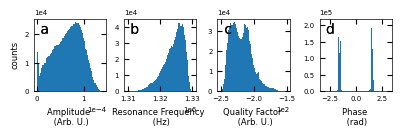

In [14]:
# we will add the appropriate phase shift to the dataset based on the fix seed,
# If your seed is different the results might vary
dataset.NN_phase_shift = np.pi/2 

# you can view the test and training dataset by replacing X_data with X_test or X_train
pred_data, scaled_param, parm = ADAHessian_model.predict(X_data)

BE_viz.SHO_hist(parm, filename="Figure_13_NN_Unscaled_Parameters_Histograms")

./Figures/Figure_15_NN_Switching_Maps.png
./Figures/Figure_15_NN_Switching_Maps.svg


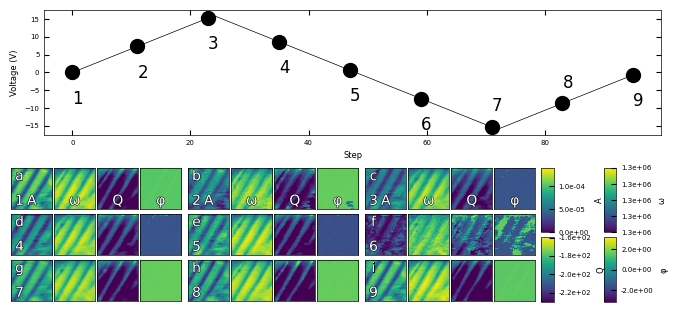

In [16]:
# you can view the test and training dataset by replacing X_data with X_test or X_train
pred_data, scaled_param, parm = ADAHessian_model.predict(X_data)

BE_viz.SHO_switching_maps(parm, filename="Figure_15_NN_Switching_Maps")


    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = 1.5707963267948966
    Noise Level = 0
                  
None

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = 1.5707963267948966
    Noise Level = 0
                  
None

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = 1.5707963267948966
    Noise Level = 

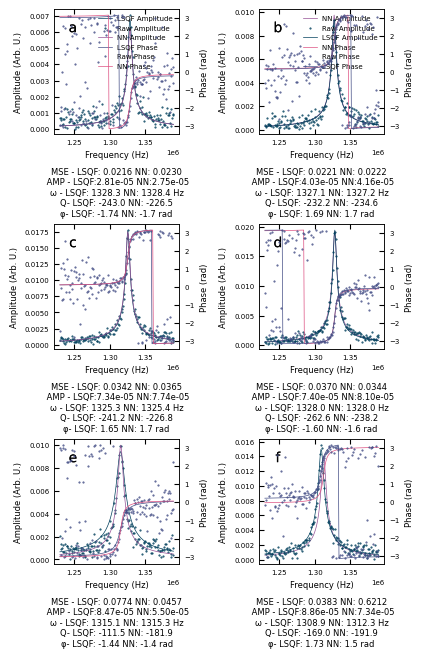

In [18]:
dataset.NN_phase_shift = np.pi/2
dataset.LSQF_phase_shift = np.pi/2
dataset.measurement_state = "all"


true_state = {
    "fitter": "LSQF",
    "raw_format": "complex",
    "resampled": True,
    "scaled": True,
    "output_shape": "index",
    "measurement_state": "all",
}

out_state = {"scaled": True, "raw_format": "magnitude spectrum"}

n = 1

LSQF = BE_viz.get_best_median_worst(
    true_state,
    prediction={"fitter": "LSQF"},
    out_state=out_state,
    SHO_results=True,
    n=n,
)

NN = BE_viz.get_best_median_worst(
    true_state, prediction=ADAHessian_model, out_state=out_state, SHO_results=True, n=n
)

data = (LSQF, NN)
names = ["LSQF", "NN"]

BE_viz.SHO_Fit_comparison(
    data,
    names,
    model_comparison=[ADAHessian_model, {"fitter": "LSQF"}],
    out_state=out_state,
    filename="Figure_14_LSQF_NN_bmw_comparison",
    # display_results = None
)

./Figures/Figure_16_Violin.png
./Figures/Figure_16_Violin.svg


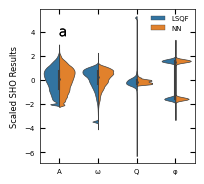

In [19]:
true_state = {
    "fitter": "LSQF",
    "raw_format": "complex",
    "resampled": True,
    "scaled": True,
3    "output_shape": "index",
    "measurement_state": "all",
}


BE_viz.violin_plot_comparison(true_state, ADAHessian_model, X_data, filename="Figure_16_Violin") 